In [1]:
import pandas as pd

In [2]:
import keras

In [3]:
import tensorflow

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("ZOMATO.NS.csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
265,2022-08-17,64.800003,65.599998,61.799999,65.250000,65.250000,258066522
266,2022-08-18,65.599998,69.250000,65.000000,67.099998,67.099998,303566868
267,2022-08-19,67.400002,68.250000,60.150002,61.450001,61.450001,295737752
268,2022-08-22,61.000000,62.849998,59.250000,62.000000,62.000000,226773007
269,2022-08-23,62.299999,65.250000,62.150002,64.449997,64.449997,218585102


<AxesSubplot:>

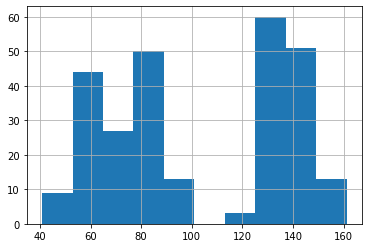

In [8]:
df["Open"].hist()

<AxesSubplot:>

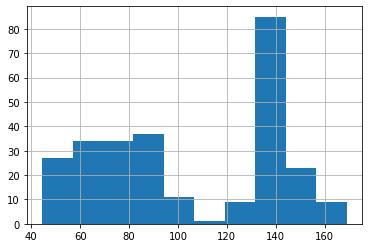

In [9]:
df["High"].hist()

<AxesSubplot:>

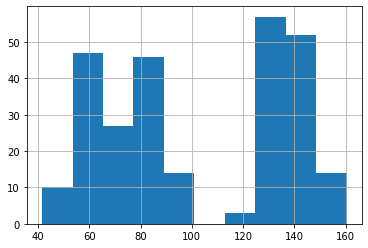

In [10]:
df["Close"].hist()

In [28]:
df1 = df.reset_index()['Close']

In [29]:
df1.shape

(270,)

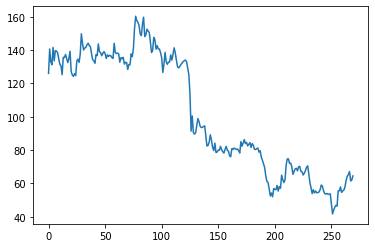

In [30]:
plt.plot(df1)

In [31]:
import numpy as np

In [32]:
df1

0      126.000000
1      140.649994
2      132.899994
3      131.199997
4      141.550003
          ...    
265     65.250000
266     67.099998
267     61.450001
268     62.000000
269     64.449997
Name: Close, Length: 270, dtype: float64

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [34]:
df1.shape

(270, 1)

In [35]:
print(df1)

[[0.71091443]
 [0.83438678]
 [0.76906862]
 [0.75474079]
 [0.84197219]
 [0.77412556]
 [0.82638006]
 [0.82385159]
 [0.81542344]
 [0.78634635]
 [0.75600508]
 [0.74968397]
 [0.70417189]
 [0.79224603]
 [0.79056042]
 [0.80657398]
 [0.78634635]
 [0.76569741]
 [0.78634635]
 [0.82300885]
 [0.72144962]
 [0.70248628]
 [0.69616517]
 [0.70965019]
 [0.69995781]
 [0.77454699]
 [0.78297514]
 [0.76654027]
 [0.80868102]
 [0.91108299]
 [0.86304256]
 [0.82932996]
 [0.83944372]
 [0.84239362]
 [0.85545715]
 [0.863464  ]
 [0.85124308]
 [0.84618626]
 [0.81120937]
 [0.7808681 ]
 [0.77370412]
 [0.7623262 ]
 [0.80615255]
 [0.80067418]
 [0.86009266]
 [0.82048038]
 [0.81626631]
 [0.80025287]
 [0.81205223]
 [0.82132325]
 [0.8116308 ]
 [0.78634635]
 [0.80446695]
 [0.7964601 ]
 [0.80235991]
 [0.80025287]
 [0.79056042]
 [0.78676778]
 [0.86304256]
 [0.81668774]
 [0.81120937]
 [0.8133164 ]
 [0.80994519]
 [0.76738301]
 [0.79056042]
 [0.78508218]
 [0.79182472]
 [0.75769069]
 [0.76696158]
 [0.76527597]
 [0.73072063]
 [0.75

In [36]:
## TRAIN TEST ABD SPLIT

In [45]:
training_size = int(len(df1)*0.70)
test_size= len(df1)-training_size

train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]


In [46]:
training_size, test_size

(189, 81)

In [47]:
#Now splitting the dataset for time series and making it into a matrix

In [48]:
def create_dataset (dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)
        

In [49]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [50]:
print(X_train.shape), print(y_train.shape)

(88, 100)
(88,)


(None, None)

In [51]:
print(X_test.shape), print(y_test.shape)

(0,)
(0,)


(None, None)

In [52]:
#Now modelling it for LSTM
#For LSTM the shape should be of 3-d, so we are adding 1 at the end of the train and test.
#The reshaped input should be in the form of [samples,timesteps,features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



IndexError: tuple index out of range

In [53]:
#Creating a Stacked LSTM model


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [55]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = "adam")

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
2/2 [==============================] - 4s 155ms/step - loss: 0.2571
Epoch 2/100
2/2 [==============================] - 0s 114ms/step - loss: 0.1241
Epoch 3/100
2/2 [==============================] - 0s 114ms/step - loss: 0.0262
Epoch 4/100
2/2 [==============================] - 0s 117ms/step - loss: 0.0468
Epoch 5/100
2/2 [==============================] - 0s 112ms/step - loss: 0.0357
Epoch 6/100
2/2 [==============================] - 0s 111ms/step - loss: 0.0096
Epoch 7/100
2/2 [==============================] - 0s 110ms/step - loss: 0.0180
Epoch 8/100
2/2 [==============================] - 0s 191ms/step - loss: 0.0261
Epoch 9/100
2/2 [==============================] - 0s 116ms/step - loss: 0.0245
Epoch 10/100
2/2 [==============================] - 0s 110ms/step - loss: 0.0171
Epoch 11/100
2/2 [==============================] - 0s 112ms/step - loss: 0.0101
Epoch 12/100
2/2 [==============================] - 0s 212ms/step - loss: 0.0107
Epoch 13/100
2/2 [===================

In [58]:
import tensorflow as tf

In [59]:
tf.__version__

'2.7.0'

In [60]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [61]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)



NameError: name 'test_predict' is not defined

In [62]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))


97.74457288334415

In [63]:
math.sqrt(mean_squared_error(y_test,test_predict))


NameError: name 'test_predict' is not defined

In [64]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

NameError: name 'test_predict' is not defined

In [65]:
len(test_data)


81

In [66]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape

(1, 0)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1)


In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


In [ ]:
df3=scaler.inverse_transform(df3).tolist()


In [ ]:
plt.plot(df3)
